# SE ESCOJE EL SIGUIENTE DATASET: CONSUMO SEMANAL DE ENERGÍA EN COLOMBIA SEGÚN XM por 3 semanas
### Primer Dataset: pronóstico oficial de demanda de energía (definitivo) 
link: https://www.xm.com.co/consumo/informes-demanda/pronostico-oficial-de-demanda-definitivo

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
url="https://raw.githubusercontent.com/JSEB99/bootcamp_DS_BIT/main/pronosticos_consumo_semanal.csv"
dataset=pd.read_csv(url,sep=',')
dataset.head(1)

,Operadores_de_red,hora,potencia,lunes,martes,miercoles,jueves,viernes,sabado,domingo
0,MC-Antioquia,1,EN,883.0,923.0,924.0,921.0,938.0,956.0,907.0


In [4]:
dataset['Operadores_de_red'].unique()

array(['MC-Antioquia', 'MC-Arauca', 'MC-Atlantico', 'MC-BajoPutumayo',
       'MC-Bolivar', 'MC-Boyaca', 'MC-Caldas', 'MC-Cali', 'MC-Caqueta',
       'MC-Cartago', 'MC-Casanare', 'MC-Cauca', 'MC-Celsia',
       'MC-Cerromatoso', 'MC-Cesar', 'MC-Choco', 'MC-CiraInfanta',
       'MC-Codensa', 'MC-CordobaSucre', 'MC-Drummond', 'MC-DrummondLoma',
       'MC-Emec', 'MC-GM', 'MC-Guaviare', 'MC-Huila', 'MC-Intercor',
       'MC-Meta', 'MC-Nariño', 'MC-NorSantander', 'MC-Oxy', 'MC-Pereira',
       'MC-Planeta', 'MC-PSTN', 'MC-Putumayo', 'MC-Quindio',
       'MC-Rubiales', 'MC-SanFernando', 'MC-Santander', 'MC-Tolima',
       'MC-TubosCaribe', 'MC-Tulua'], dtype=object)

In [5]:
dataset.index=dataset['hora']
dataset=dataset.drop('potencia',axis='columns')
dataset=dataset.drop('hora',axis='columns')
dataset

,Operadores_de_red,lunes,martes,miercoles,jueves,viernes,sabado,domingo
hora,,,,,,,,
1,MC-Antioquia,883.000000,923.000000,924.000000,921.000000,938.000000,956.000000,907.000000
2,MC-Antioquia,850.000000,884.000000,884.000000,881.000000,899.000000,910.000000,860.000000
3,MC-Antioquia,834.000000,865.000000,868.000000,865.000000,878.000000,883.000000,828.000000
4,MC-Antioquia,835.000000,870.000000,870.000000,873.000000,881.000000,875.000000,814.000000
5,MC-Antioquia,898.000000,933.000000,933.000000,936.000000,944.000000,909.000000,816.000000
...,...,...,...,...,...,...,...,...
20,MC-Tulua,36.959228,37.047229,36.744836,36.730304,36.481766,34.406029,31.727528
21,MC-Tulua,35.926917,35.744780,35.460360,35.330803,35.069771,32.978337,31.410340
22,MC-Tulua,31.985050,31.787048,31.448451,31.416077,31.188189,29.304789,28.507068


In [6]:
consumo_boyaca = dataset[dataset['Operadores_de_red']=='MC-Boyaca']
consumo_boyaca = consumo_boyaca.drop('Operadores_de_red',axis='columns')
promedio_consumo_boyaca = consumo_boyaca.groupby('hora').mean()
promedio_consumo_boyacaT=promedio_consumo_boyaca.T
promedio_consumo_boyaca.head()
promedio_consumo_boyacaT.index

Index(['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado',
       'domingo'],
      dtype='object')

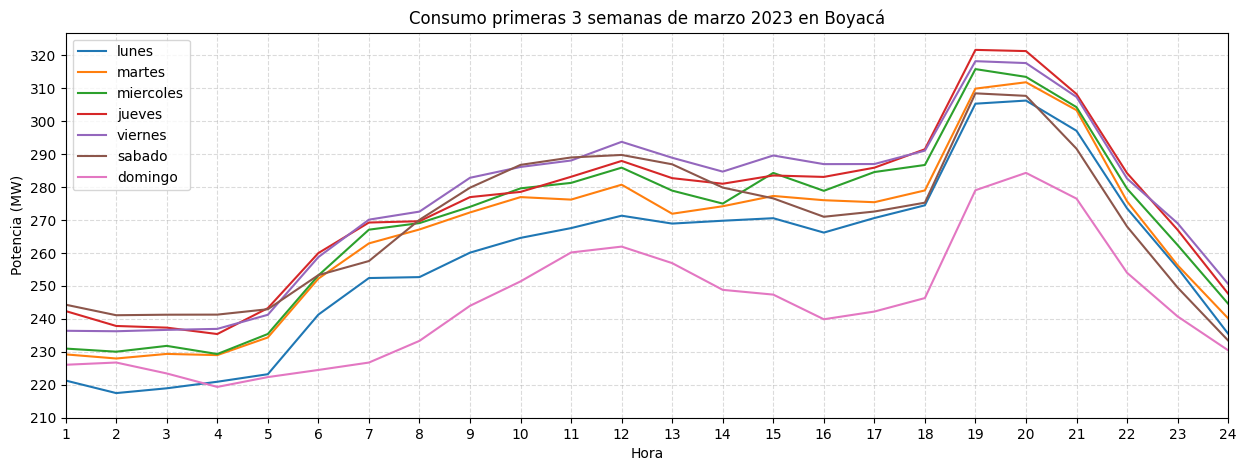

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(linestyle='--',alpha=0.45)
ax.plot(promedio_consumo_boyaca.index,promedio_consumo_boyaca['lunes'],label='lunes')
ax.plot(promedio_consumo_boyaca.index,promedio_consumo_boyaca['martes'],label='martes')
ax.plot(promedio_consumo_boyaca.index,promedio_consumo_boyaca['miercoles'],label='miercoles')
ax.plot(promedio_consumo_boyaca.index,promedio_consumo_boyaca['jueves'],label='jueves')
ax.plot(promedio_consumo_boyaca.index,promedio_consumo_boyaca['viernes'],label='viernes')
ax.plot(promedio_consumo_boyaca.index,promedio_consumo_boyaca['sabado'],label='sabado')
ax.plot(promedio_consumo_boyaca.index,promedio_consumo_boyaca['domingo'],label='domingo')
ax.set_xlabel('Hora')  
ax.set_ylabel('Potencia (MW)') 
ax.set_title('Consumo primeras 3 semanas de marzo 2023 en Boyacá')
ax.set_xticks(np.arange(0, len(promedio_consumo_boyaca.index)+1, 1))
ax.set_yticks(np.arange(210, max(promedio_consumo_boyaca['jueves']), 10))
ax.set_xlim(promedio_consumo_boyaca.index[0], promedio_consumo_boyaca.index[-1])
ax.legend()


Se identifica que en Boyacá durante las 3 primeras semanas del mes de Marzo se evidenció un consumo de potencia mayor el día Jueves y el menor fue el día Domingo. Con una gran diferencia frente a las demas. Esto puede significar que las personas el día Domingo no usan mucha energía electríca, las industrías y empresas no operan.
Ademas a la forma que dan las gráficas se le conoce como la curva de pato.


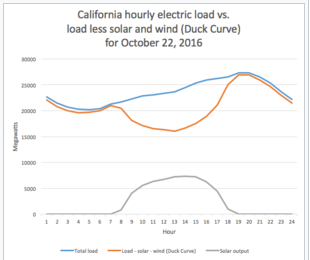


esto indica que en las horas que mas se consume energía son de 6 a 9 de la noche.
tambien se tiene un pico a la hora del almuerzo, y donde se consume menos energía es en la madrugada.

([<matplotlib.patches.Wedge at 0x1cb9660a260>,
 [Text(0.9965234293698353, 0.46576931491563844, 'lunes'),
  Text(0.2680575694756981, 1.0668388535513607, 'martes'),
  Text(-0.6746926111234124, 0.8687864412474864, 'miercoles'),
  Text(-1.0999517474948026, -0.010303066685712448, 'jueves'),
  Text(-0.649752240014866, -0.8875933903514965, 'viernes'),
  Text(0.3135669693078476, -1.0543603538444963, 'sabado'),
  Text(1.007357085776555, -0.4418503159846857, 'domingo')],
 [Text(0.5435582342017282, 0.2540559899539846, '13.92%'),
  Text(0.1462132197140171, 0.5819121019371057, '14.33%'),
  Text(-0.36801415152186123, 0.4738835134077198, '14.52%'),
  Text(-0.5999736804517104, -0.005619854555843152, '14.76%'),
  Text(-0.35441031273538137, -0.48414184928263443, '14.83%'),
  Text(0.1710365287133714, -0.5751056475515434, '14.48%'),
  Text(0.5494675013326663, -0.241009263264374, '13.16%')])

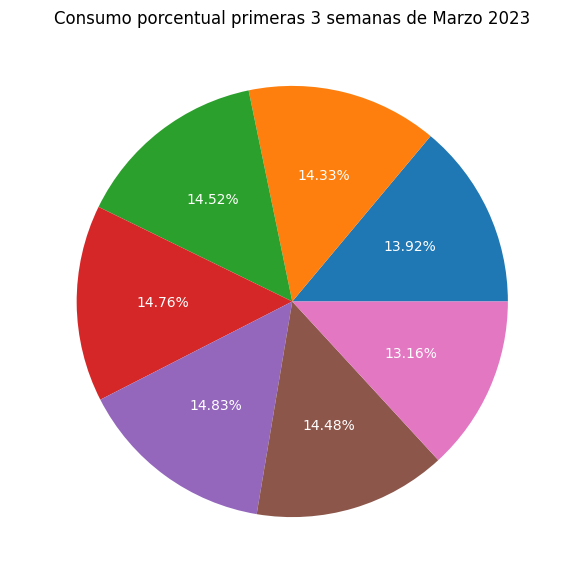

In [8]:
promedio_semanal_boyaca = promedio_consumo_boyaca.mean()
promedio_semanal_boyaca.index
fig1,ax1=plt.subplots(figsize=(10,7))
ax1.set_title('Consumo porcentual primeras 3 semanas de Marzo 2023')
ax1.pie(promedio_semanal_boyaca,labels=promedio_semanal_boyaca.index,autopct='%.2f%%',textprops={'color':"w"})


Si miramos los porcentajes entre todos los días a pesar de que se noto un diferencia entre el día domingo frente a los demas días, a nivel porcentual no es tan notoría la diferencia penas variando casi un 2% frente a los demas días y en general todos consumen rangos similares para dicho periodo de tiempo

In [9]:
consumo_antioquia = dataset[dataset['Operadores_de_red']=='MC-Antioquia']
consumo_antioquia = consumo_antioquia.drop('Operadores_de_red',axis='columns')
promedio_consumo_antioquia = consumo_antioquia.groupby('hora').mean()
promedio_semanal_antioquia = promedio_consumo_antioquia.mean()
consumo_codensa = dataset[dataset['Operadores_de_red']=='MC-Codensa']
consumo_codensa = consumo_codensa.drop('Operadores_de_red',axis='columns')
promedio_consumo_codensa = consumo_codensa.groupby('hora').mean()
promedio_semanal_codensa = promedio_consumo_codensa.mean()



([<matplotlib.patches.Wedge at 0x1cb962ac730>,
 [Text(0.46216162823143586, 0.9982016977497425, 'MC-Antioquia'),
  Text(-0.8995726606915181, 0.6330632102218411, 'MC-Boyaca'),
  Text(-0.19652429277217748, -1.0823022694009266, 'MC-Codensa')],
 [Text(0.25208816085351043, 0.5444736533180413, '36.20%'),
  Text(-0.490675996740828, 0.3453072055755496, '8.08%'),
  Text(-0.10719506878482407, -0.5903466924005053, '55.72%')])

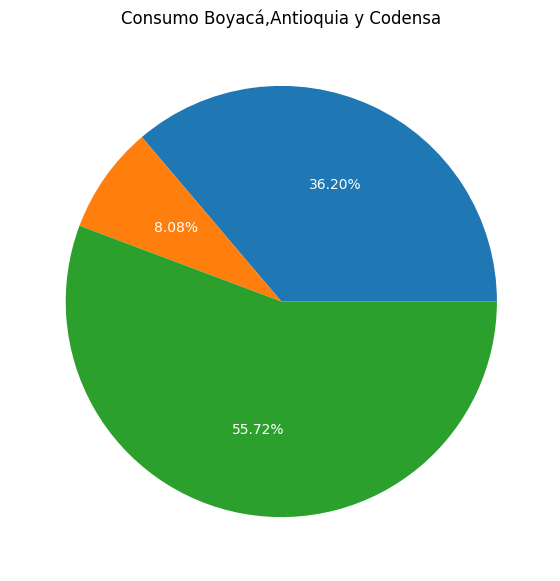

In [10]:
total_promedio_antioquia = promedio_semanal_antioquia.sum()
total_promedio_boyaca = promedio_semanal_boyaca.sum()
total_promedio_codensa = promedio_semanal_codensa.sum()
comparacion = [total_promedio_antioquia,total_promedio_boyaca,total_promedio_codensa]
titulos = ['MC-Antioquia','MC-Boyaca','MC-Codensa']
fig2,ax2=plt.subplots(figsize=(10,7))
ax2.set_title('Consumo Boyacá,Antioquia y Codensa')
ax2.pie(comparacion,labels=titulos,autopct='%.2f%%',textprops={'color':"w"})

Si comparamos la comercializadora de Boyacá con comercializadoras de energía más grandes como la de Antioquia o la de Codensa (maneja a Bogotá), se notan grandes diferencias como por ejemplo una ciudad de 8 millones de habitantes como lo es Bogotá que se incluye en Codensa, tienen un consumo de energía que es mayor a la de Antioquia y Boyacá sumadas. Ademas que Boyacá es apenas un 8% en comparación al 36% de Antioquia y 56% de Codensa.

# Se procede a realizar las mismas gráficas usando la biblioteca SEABORN en este caso con Codensa

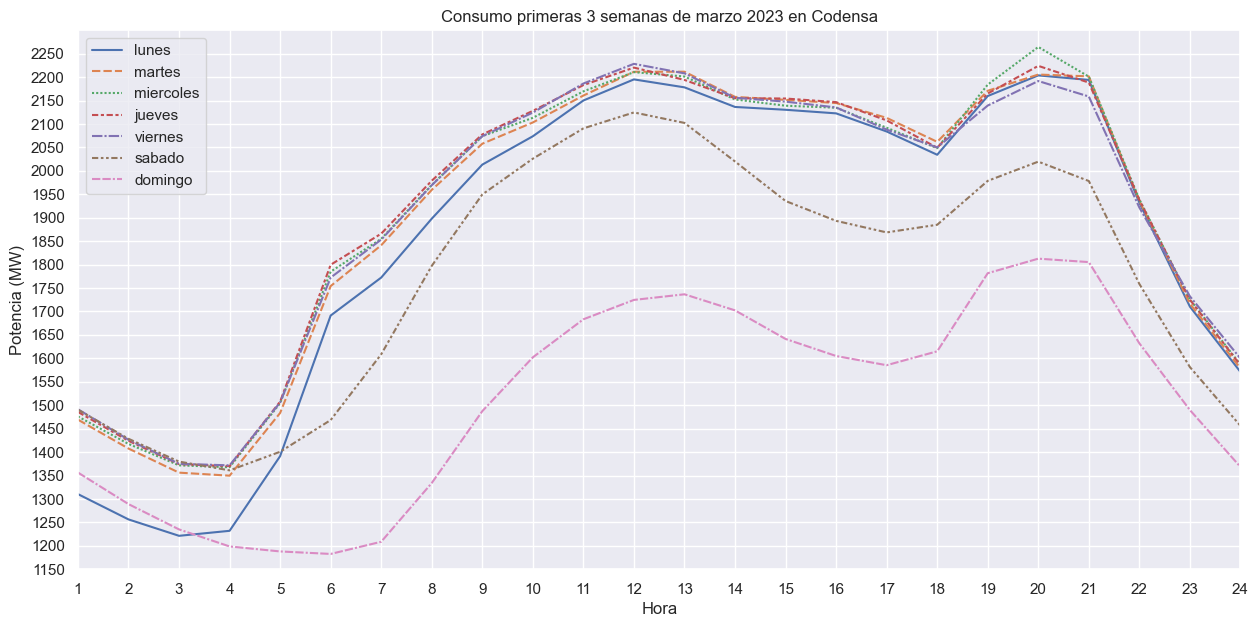

In [11]:
sns.set(rc={"figure.figsize":(15, 7)})
ax3=sns.lineplot(data=promedio_consumo_codensa[['lunes','martes','miercoles','jueves','viernes','sabado','domingo']])
ax3.set_xlim(promedio_consumo_codensa.index[0], promedio_consumo_codensa.index[-1])
ax3.set_ylim(1150,2300)
ax3.set_xlabel('Hora')  
ax3.set_ylabel('Potencia (MW)') 
ax3.set_title('Consumo primeras 3 semanas de marzo 2023 en Codensa')
ax3.set_xticks(np.arange(1, len(promedio_consumo_codensa.index)+1, 1))
ax3.set_yticks(np.arange(1150, max(promedio_consumo_codensa['miercoles']), 50))
sns.move_legend(ax3,"upper left")

Analizando los consumos por Codensa, notamos otra vez la curva de pato pero en este caso existen 2 días que se difieren bastante a los demas, los cuales son sabado y domingo. Indicando que las personas los fines de semana no consumen demasiada energía eléctrica en Bogotá, al manejar una industrialización mas grande que la de Boyacá al parar las industrias y algunos comercios se nota el bajon en consumo energético. Esto genera problemas por las grandes variaciones que se tienen. Ademas que a diferencia de Boyacá se consume mas energía de lunes a viernes desde las 10 de la mañana a las 10 de la noche con niveles similares de potencia.

([<matplotlib.patches.Wedge at 0x1cb9a228c70>,
 [Text(0.9872976327492942, 0.48501895258602035, 'lunes'),
  Text(0.206912331455126, 1.080364423281239, 'martes'),
  Text(-0.7491704998907216, 0.8054461882047034, 'miercoles'),
  Text(-1.092173678733913, -0.13098341681614392, 'jueves'),
  Text(-0.5382214159296013, -0.9593319068157461, 'viernes'),
  Text(0.42192586868050047, -1.0158634560501747, 'sabado'),
  Text(1.025249472373762, -0.3985768676144199, 'domingo')],
 [Text(0.538525981499615, 0.26455579231964743, '14.53%'),
  Text(0.11286127170279599, 0.5892896854261304, '14.91%'),
  Text(-0.40863845448584807, 0.4393342844752927, '14.96%'),
  Text(-0.5957310974912251, -0.07144550008153304, '14.99%'),
  Text(-0.29357531777978246, -0.5232719491722251, '14.94%'),
  Text(0.2301413829166366, -0.5541073396637316, '13.86%'),
  Text(0.5592269849311429, -0.21740556415331994, '11.80%')])

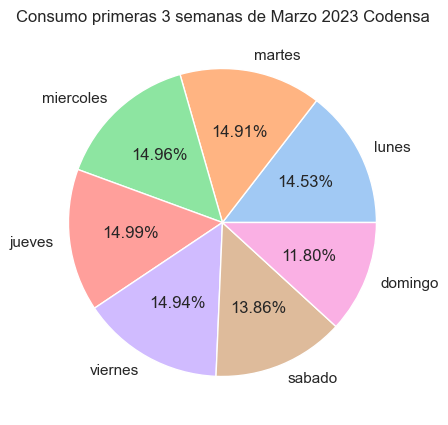

In [12]:

promedio_semanal_codensa.index
fig4,ax4=plt.subplots(figsize=(7,5))
ax4.set_title('Consumo primeras 3 semanas de Marzo 2023 Codensa')
colors = sns.color_palette('pastel')[0:7]
ax4.pie(promedio_semanal_codensa,labels=promedio_semanal_codensa.index,autopct='%.2f%%',colors=colors)


Para este gráfico no difiere mucho de Boyacá en cuanto a porcentajes se incrementa a un casi 3% la diferencia de consumo energético del día domingo a los demas días. Pero a manera general todos son relativamente parecidos

In [22]:
consumo_NorSantander = dataset[dataset['Operadores_de_red']=='MC-NorSantander']
consumo_NorSantander = consumo_NorSantander.drop('Operadores_de_red',axis='columns')
promedio_consumo_NorSantander = consumo_NorSantander.groupby('hora').mean()
promedio_semanal_NorSantander = promedio_consumo_NorSantander.mean()
total_promedio_NorSantander = promedio_semanal_NorSantander.sum()

consumo_Celsia = dataset[dataset['Operadores_de_red']=='MC-Celsia']
consumo_Celsia = consumo_Celsia.drop('Operadores_de_red',axis='columns')
promedio_consumo_Celsia = consumo_Celsia.groupby('hora').mean()
promedio_semanal_Celsia = promedio_consumo_Celsia.mean()
total_promedio_Celsia = promedio_semanal_Celsia.sum()

consumo_Cesar = dataset[dataset['Operadores_de_red']=='MC-Cesar']
consumo_Cesar = consumo_Cesar.drop('Operadores_de_red',axis='columns')
promedio_consumo_Cesar = consumo_Cesar.groupby('hora').mean()
promedio_semanal_Cesar = promedio_consumo_Cesar.mean()
total_promedio_Cesar = promedio_semanal_Cesar.sum()


[Text(0.5, 1.0, 'Consumo según algunas distribuidores de energía'),
 Text(0.5, 0, 'Regiones'),
 Text(0, 0.5, 'Potencia (MW)')]

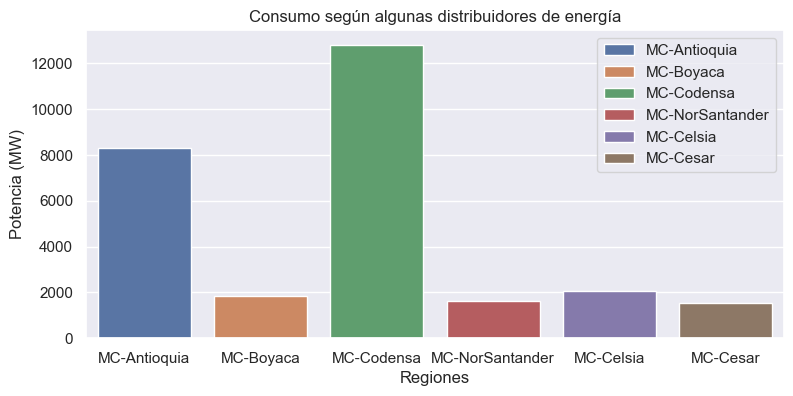

In [37]:
total_promedio_antioquia = promedio_semanal_antioquia.sum()
total_promedio_boyaca = promedio_semanal_boyaca.sum()
total_promedio_codensa = promedio_semanal_codensa.sum()
comparacion = [total_promedio_antioquia,total_promedio_boyaca,total_promedio_codensa,total_promedio_NorSantander,total_promedio_Celsia,total_promedio_Cesar]
titulos = ['MC-Antioquia','MC-Boyaca','MC-Codensa','MC-NorSantander','MC-Celsia','MC-Cesar']
fig6, ax6 = plt.subplots(figsize=(9,4))
sns.barplot(x=titulos,y=comparacion,hue=titulos,ax=ax6,dodge=False).set(title='Consumo según algunas distribuidores de energía',xlabel='Regiones',ylabel='Potencia (MW)')

# CONCLUSIÓN
Se añaden otros distribuidores de energía, y se grafican según su consumo por las 3 primeras semanas de Marzo. Se observa que de las 6 escogidas, no todas logran superar los 20MW, y su diferencia en comparación a regiones mas transitadas es mas del cuadruple. por lo cual las areas a regular la energía deberían ser las de mayor consumo, a su vez se tiene que tener en cuenta que las demas zonas al ser menos transitadas, en su mayoria tienen zonas no interconectadas, teniendo en cuenta que las escogidas son zonas que estan dentro de la red nacional de energía